
 Loading dataset from: E:\FAKE NEWS DECT\fake news dataset\data.csv
 Dataset loaded with 4009 rows and 4 columns.

Available columns: ['URLs', 'Headline', 'Body', 'Label']

 Training model...

 Model Performance:
Accuracy : 0.9688
Precision: 0.9580
Recall   : 0.9759
F1 Score : 0.9669

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       428
           1       0.96      0.98      0.97       374

    accuracy                           0.97       802
   macro avg       0.97      0.97      0.97       802
weighted avg       0.97      0.97      0.97       802



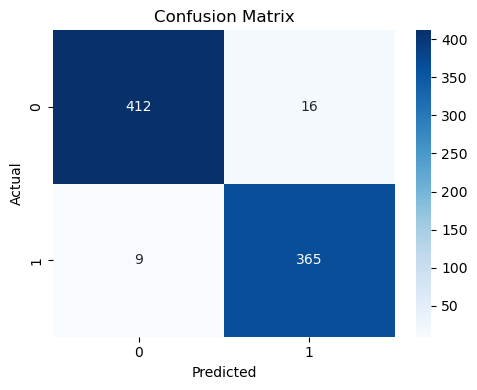


Training complete! Model files are ready for prediction.


In [9]:
# By: Mujahid Hussain
# Project: Fake News Detection using Machine Learning (Training Part)

import pandas as pd
import numpy as np
import re
import os
import joblib
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from nltk.corpus import stopwords


# STEP 1: Load and Prepare Dataset 
def load_and_prepare_data():
    dataset_path = r"E:\FAKE NEWS DECT\fake news dataset\data.csv"
    print(f"\n Loading dataset from: {dataset_path}")

    if not os.path.exists(dataset_path):
        print(" Dataset not found. Please check your path.")
        exit()

    df = pd.read_csv(dataset_path)
    print(f" Dataset loaded with {len(df)} rows and {len(df.columns)} columns.\n")
    print("Available columns:", list(df.columns))

    if 'Label' not in df.columns:
        print("'Label' column not found! Creating dummy labels.")
        df['Label'] = np.random.randint(0, 2, len(df))
    label_col = 'Label'

    # Combine text columns
    if 'Headline' in df.columns and 'Body' in df.columns:
        df['text'] = df['Headline'].astype(str) + " " + df['Body'].astype(str)
    elif 'Headline' in df.columns:
        df['text'] = df['Headline'].astype(str)
    elif 'Body' in df.columns:
        df['text'] = df['Body'].astype(str)
    else:
        print(" Could not find Headline or Body column.")
        exit()

    # Convert labels to numeric
    if df[label_col].dtype == 'object':
        df[label_col] = df[label_col].apply(lambda x: 1 if str(x).lower() == 'fake' else 0)

    df = df[['text', label_col]].rename(columns={label_col: 'label'})
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)

    return df

#  STEP 2: Text Cleaning 
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    words = [word for word in text.split() if word not in STOPWORDS]
    return " ".join(words)

# STEP 3: Train Model 
def train_model(df):
    print("\n Training model...")
    df["clean_text"] = df["text"].apply(clean_text)

    X = df["clean_text"]
    y = df["label"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1, 2))
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)

    model = LogisticRegression(max_iter=300)
    model.fit(X_train_tfidf, y_train)

    y_pred = model.predict(X_test_tfidf)

# Show Model Results 
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("\n Model Performance:")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}\n")

    print("Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Save Model and TF-IDF
    joblib.dump(model, "fake_news_model.pkl")
    joblib.dump(tfidf, "tfidf_vectorizer.pkl")
   
# MAIN 
if __name__ == "__main__":
    
    df = load_and_prepare_data()
    train_model(df)
    print("\nTraining complete! Model files are ready for prediction.")


In [13]:
# By: Mujahid Hussain
# Project: Fake News Detection using Machine Learning (Prediction Part)

import joblib
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords', quiet=True)
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    words = [word for word in text.split() if word not in STOPWORDS]
    return " ".join(words)

def predict_news(news_list):
    print("\n Loading model for prediction...")
    model = joblib.load("fake_news_model.pkl")
    tfidf = joblib.load("tfidf_vectorizer.pkl")

    clean_news = [clean_text(news) for news in news_list]
    X_input = tfidf.transform(clean_news)
    preds = model.predict(X_input)

    print("\n Prediction Results:")
    for text, label in zip(news_list, preds):
        print("--------------------------------------------------")
        print(f"News: {text[:100]}...")
        print(f"Prediction: {'FAKE Naws' if label == 1 else 'REAL Naws'}")
    print("--------------------------------------------------")

if __name__ == "__main__":
    inter_news = [
        "Babar Azam to retire from international cricket to join Bollywood..",
    ]
    predict_news(inter_news)



 Loading model for prediction...

 Prediction Results:
--------------------------------------------------
News: Babar Azam to retire from international cricket to join Bollywood.....
Prediction: FAKE Naws
--------------------------------------------------
